# Práctica - Keras y Redes Convolucionales
## Redes neuronales de convolución (CNN)
Como vamos a ver, las capas de convolución se implementan de manera muy fácil y sencilla con KERAS. Para ello vamos a recordar que las capas convolucionales constan de una primera capa de convolución seguida (normalmente) de una capa de pooling. Las capas de convolución 2D, como las que vamos a usar, funcionan con inputs bidimensionales. Por tanto, la imagen debe conservar su estructura de grid 28x28 y no transformarlo a 1D como hacíamos en los casos anteriores. Eso sí, si posteriormente a las capas convolucionales se va a añadir una capa densa será necesario redimensionarlo a 1D. ESta redimensionalización a 1D en un momento concreto de la secuencia de capas se consigue utilizando el comando `layer_flatten()`, que básicamente concateniza los inputs. Para las capas de convolución y de pooling, las funciones a usar son `layer_conv_2d()` y `layer_max_pooling_2d()`. En cuanto a la capa de convolución, los parámetros a modificar incluyen el número de mapas por capa (`filters = 32` en el código), el tamaño bidimensional del kernel (`kernel_size = 3x3` en el código) y la función de activación. En cuanto al pooling, el tamaño del pooling se especifica mediante el parámteros pool_size. En el siguiente ejemplo podemos ver una implementación de una red convolucional con una capa densa al final de 128 neuronas ocultas.

In [1]:
# Aquí se incluye el preproceso y carga de datos visto en otras prácticas
library(keras)
mnist <- dataset_mnist()
x_train <- mnist$train$x
y_train <- mnist$train$y
x_test <- mnist$test$x
y_test <- mnist$test$y
x_train <- x_train / 255
x_test <- x_test / 255
y_train <- to_categorical(y_train, 10)

dim(x_train) <- c(nrow(x_train), 28,28,1)
dim(x_test) <- c(nrow(x_test), 28,28,1) # El último argumento que es igual a 1, es por si nuestro input es tridimensional, que no es el caso.Pero se indica ya que "layer_conv_2d()" lo requiere.
model1 <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu',
                input_shape = c(28,28,1)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 10, activation = 'softmax')

# Compile model
model1 %>% compile(
  optimizer = optimizer_adadelta(),
  loss = "mse",
  metrics = "accuracy"
)

# Train model
history1 <- model1 %>% fit(
  x_train, y_train,
  batch_size = 100,
  epochs = 3,
  validation_split = 0.2
)

model1

Model
Model: "sequential"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_1 (Conv2D)                   (None, 26, 26, 32)              320         
________________________________________________________________________________
conv2d (Conv2D)                     (None, 24, 24, 64)              18496       
________________________________________________________________________________
max_pooling2d (MaxPooling2D)        (None, 12, 12, 64)              0           
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 12, 12, 64)              0           
________________________________________________________________________________
flatten (Flatten)                   (None, 9216)                    0           
________________________________________________________________________________
de

Fijaros en como se ha reducido el tamaño de la imagen en cada capa de convolución. Esto se debe a que el kernel se va desplazando horizontal y verticalmente a través de la imagen haciendo recuadros de 3x3, y el número de recuadros de 3x3 que ocupan un cuadro de 28x28, desplazándose una unidad en la longitud horizontal (o vertical) son 26. La longitud del desplazamiento tanto en la horizontal como en la vertical se regula mediante el parámetro stride (en el caso anterior `stride = 1`). Si incrementásemos el valor del parámetro stride, el grid resultante de la capa de convolución tendría una resolución menor. Una manera de evitar la reducción del grid en cada capa de convolución es incluyendo filas y columnas de 0s. De esta manera, si incrementamos la dimensión del grid inicial de 28x28 a 30x30, siendo las dimensiones añadidas 0s, la reducción de la dimensión de la capa de convolución nos devolvería al grid original de 28x28, evitando por tanto la pérdida de información. Añadir columnas y filas de 0s se hace con el parámetro padding. En el siguiente ejemplo vamos a ver como implementarlo:

In [2]:
model2 <- keras_model_sequential() %>%
  layer_conv_2d(filters = 32, kernel_size = c(3,3), activation = 'relu', strides = c(1L,1L), padding = "same", 
                input_shape = c(28,28,1)) %>% 
  layer_conv_2d(filters = 64, kernel_size = c(3,3), activation = 'relu') %>% 
  layer_max_pooling_2d(pool_size = c(2, 2)) %>% 
  layer_dropout(rate = 0.25) %>% 
  layer_flatten() %>% 
  layer_dense(units = 128, activation = 'relu') %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 10, activation = 'softmax')

# Compile model
model2 %>% compile(
  optimizer = optimizer_adadelta(),
  loss = "mse",
  metrics = "accuracy"
)

# Train model
history2 <- model2 %>% fit(
  x_train, y_train,
  batch_size = 100,
  epochs = 3,
  validation_split = 0.2
)

model2

Model
Model: "sequential_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
conv2d_3 (Conv2D)                   (None, 28, 28, 32)              320         
________________________________________________________________________________
conv2d_2 (Conv2D)                   (None, 26, 26, 64)              18496       
________________________________________________________________________________
max_pooling2d_1 (MaxPooling2D)      (None, 13, 13, 64)              0           
________________________________________________________________________________
dropout_3 (Dropout)                 (None, 13, 13, 64)              0           
________________________________________________________________________________
flatten_1 (Flatten)                 (None, 10816)                   0           
________________________________________________________________________________


Fijaros como tras la primera convolución hemos mantenido la dimensión original de 28x28, mientras que tras la segunda capa de convolución (donde no incluimos filas y columnas de 0s) el tamaño del grid se ha reducido a 26x26.

Además, vemos como para tan solo 3 épocas se alcanzan valores de accuracy muy altos.

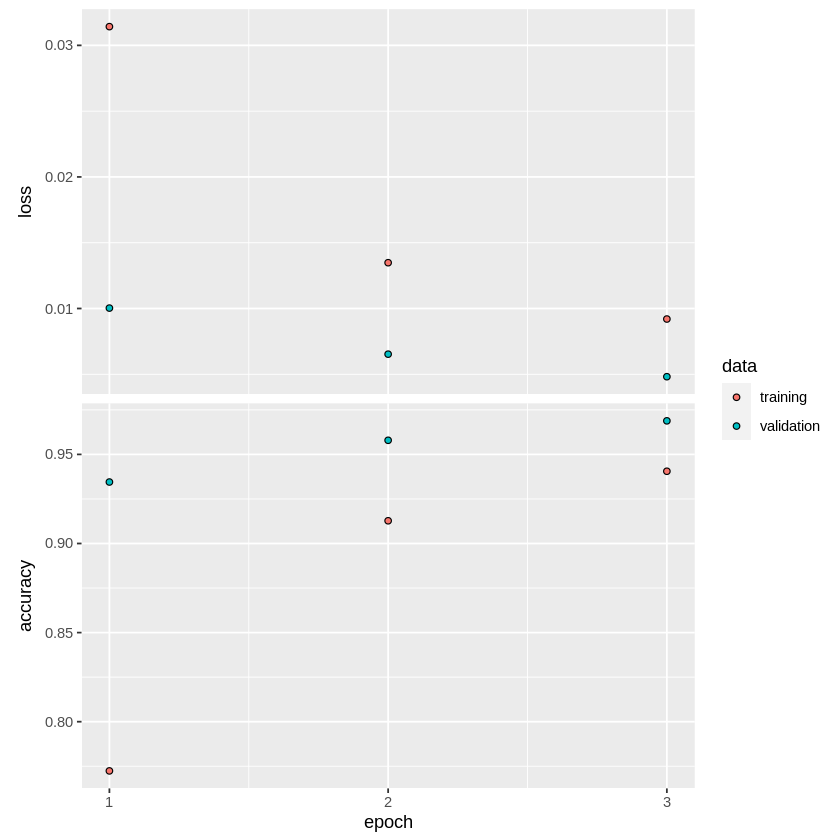

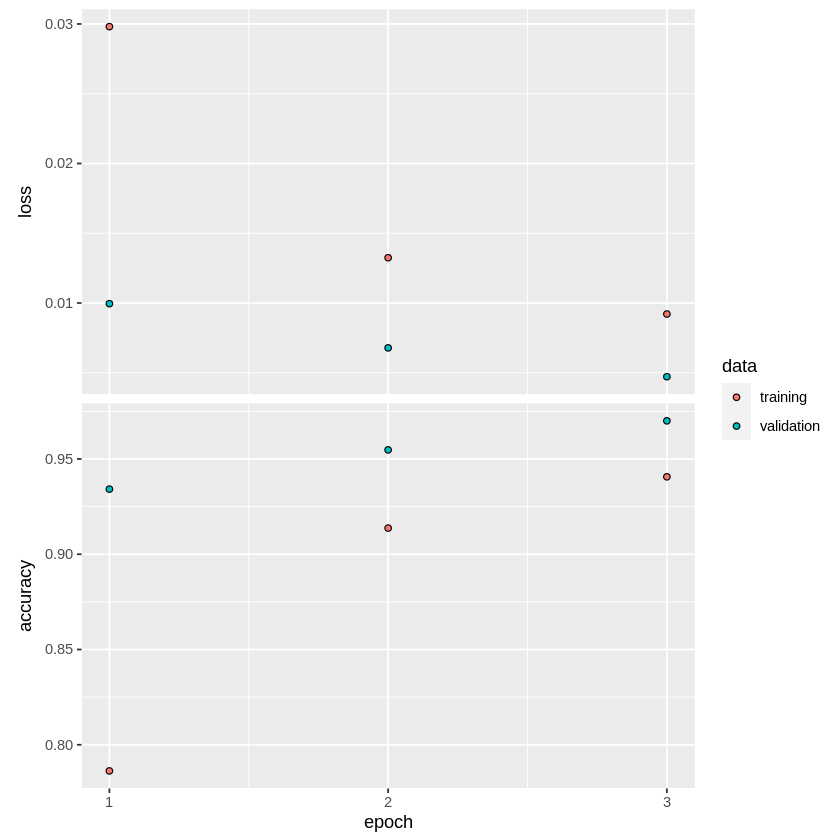

In [3]:
plot(history1)
plot(history2)